In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from keras import models
from keras import layers
from keras import optimizers
from keras import losses
from keras import metrics
from keras.utils import to_categorical

# Setup dataframe and confirm correlations from EDA

In [2]:
data = pd.read_csv('data/diabetes_012_health_indicators_BRFSS2015.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [4]:
data["Diabetes_012"] = data["Diabetes_012"].astype(int)
data["HighBP"] = data["HighBP"].astype(int)
data["HighChol"] = data["HighChol"].astype(int)
data["CholCheck"] = data["CholCheck"].astype(int)
data["BMI"] = data["BMI"].astype(int)
data["Smoker"] = data["Smoker"].astype(int)
data["Stroke"] = data["Stroke"].astype(int)
data["HeartDiseaseorAttack"] = data["HeartDiseaseorAttack"].astype(int)
data["PhysActivity"] = data["PhysActivity"].astype(int)
data["Fruits"] = data["Fruits"].astype(int) 
data["Veggies"] = data["Veggies"].astype(int)
data["HvyAlcoholConsump"] = data["HvyAlcoholConsump"].astype(int)
data["AnyHealthcare"] = data["AnyHealthcare"].astype(int)
data["NoDocbcCost"] = data["NoDocbcCost"].astype(int)
data["GenHlth"] = data["GenHlth"].astype(int)
data["MentHlth"] = data["MentHlth"].astype(int)
data["PhysHlth"] = data["PhysHlth"].astype(int)
data["DiffWalk"] = data["DiffWalk"].astype(int)
data["Sex"] = data["Sex"].astype(int)
data["Age"] = data["Age"].astype(int)
data["Education"] = data["Education"].astype(int)
data["Income"] =data["Income"].astype(int)



In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   Diabetes_012          253680 non-null  int32
 1   HighBP                253680 non-null  int32
 2   HighChol              253680 non-null  int32
 3   CholCheck             253680 non-null  int32
 4   BMI                   253680 non-null  int32
 5   Smoker                253680 non-null  int32
 6   Stroke                253680 non-null  int32
 7   HeartDiseaseorAttack  253680 non-null  int32
 8   PhysActivity          253680 non-null  int32
 9   Fruits                253680 non-null  int32
 10  Veggies               253680 non-null  int32
 11  HvyAlcoholConsump     253680 non-null  int32
 12  AnyHealthcare         253680 non-null  int32
 13  NoDocbcCost           253680 non-null  int32
 14  GenHlth               253680 non-null  int32
 15  MentHlth              253680 non-n

In [6]:
data.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,1,1,40,1,0,0,0,0,...,1,0,5,18,15,1,0,9,4,3
1,0,0,0,0,25,1,0,0,1,0,...,0,1,3,0,0,0,0,7,6,1
2,0,1,1,1,28,0,0,0,0,1,...,1,1,5,30,30,1,0,9,4,8
3,0,1,0,1,27,0,0,0,1,1,...,1,0,2,0,0,0,0,11,3,6
4,0,1,1,1,24,0,0,0,1,1,...,1,0,2,3,0,0,0,11,5,4


In [7]:
#make a new dataframe with the following columns Diabetes_binary, HighBP, PhysHlth, DiffWalk, BMI, GenHlth, HighChol, HeartDiseaseorAttack, Age
Diabetes = data[[ 'HighBP', 'PhysHlth', 'DiffWalk', 'BMI', 'GenHlth', 'HighChol', 'HeartDiseaseorAttack', 'Age']]

In [8]:
# copy diabetes_binary from data into data frame Diabetes2
Diabetes['y'] = data['Diabetes_012']

C:\Users\shayn\AppData\Local\Temp\ipykernel_21820\1296437669.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Diabetes['y'] = data['Diabetes_012']


In [9]:
Diabetes.sample(5)

,HighBP,PhysHlth,DiffWalk,BMI,GenHlth,HighChol,HeartDiseaseorAttack,Age,y
178228,0,1,0,32,3,0,0,4,0
38852,1,10,1,21,2,0,0,13,0
9159,0,28,0,26,3,0,0,8,0
155178,1,5,1,32,3,0,1,9,2
35931,0,0,0,33,2,1,0,9,2


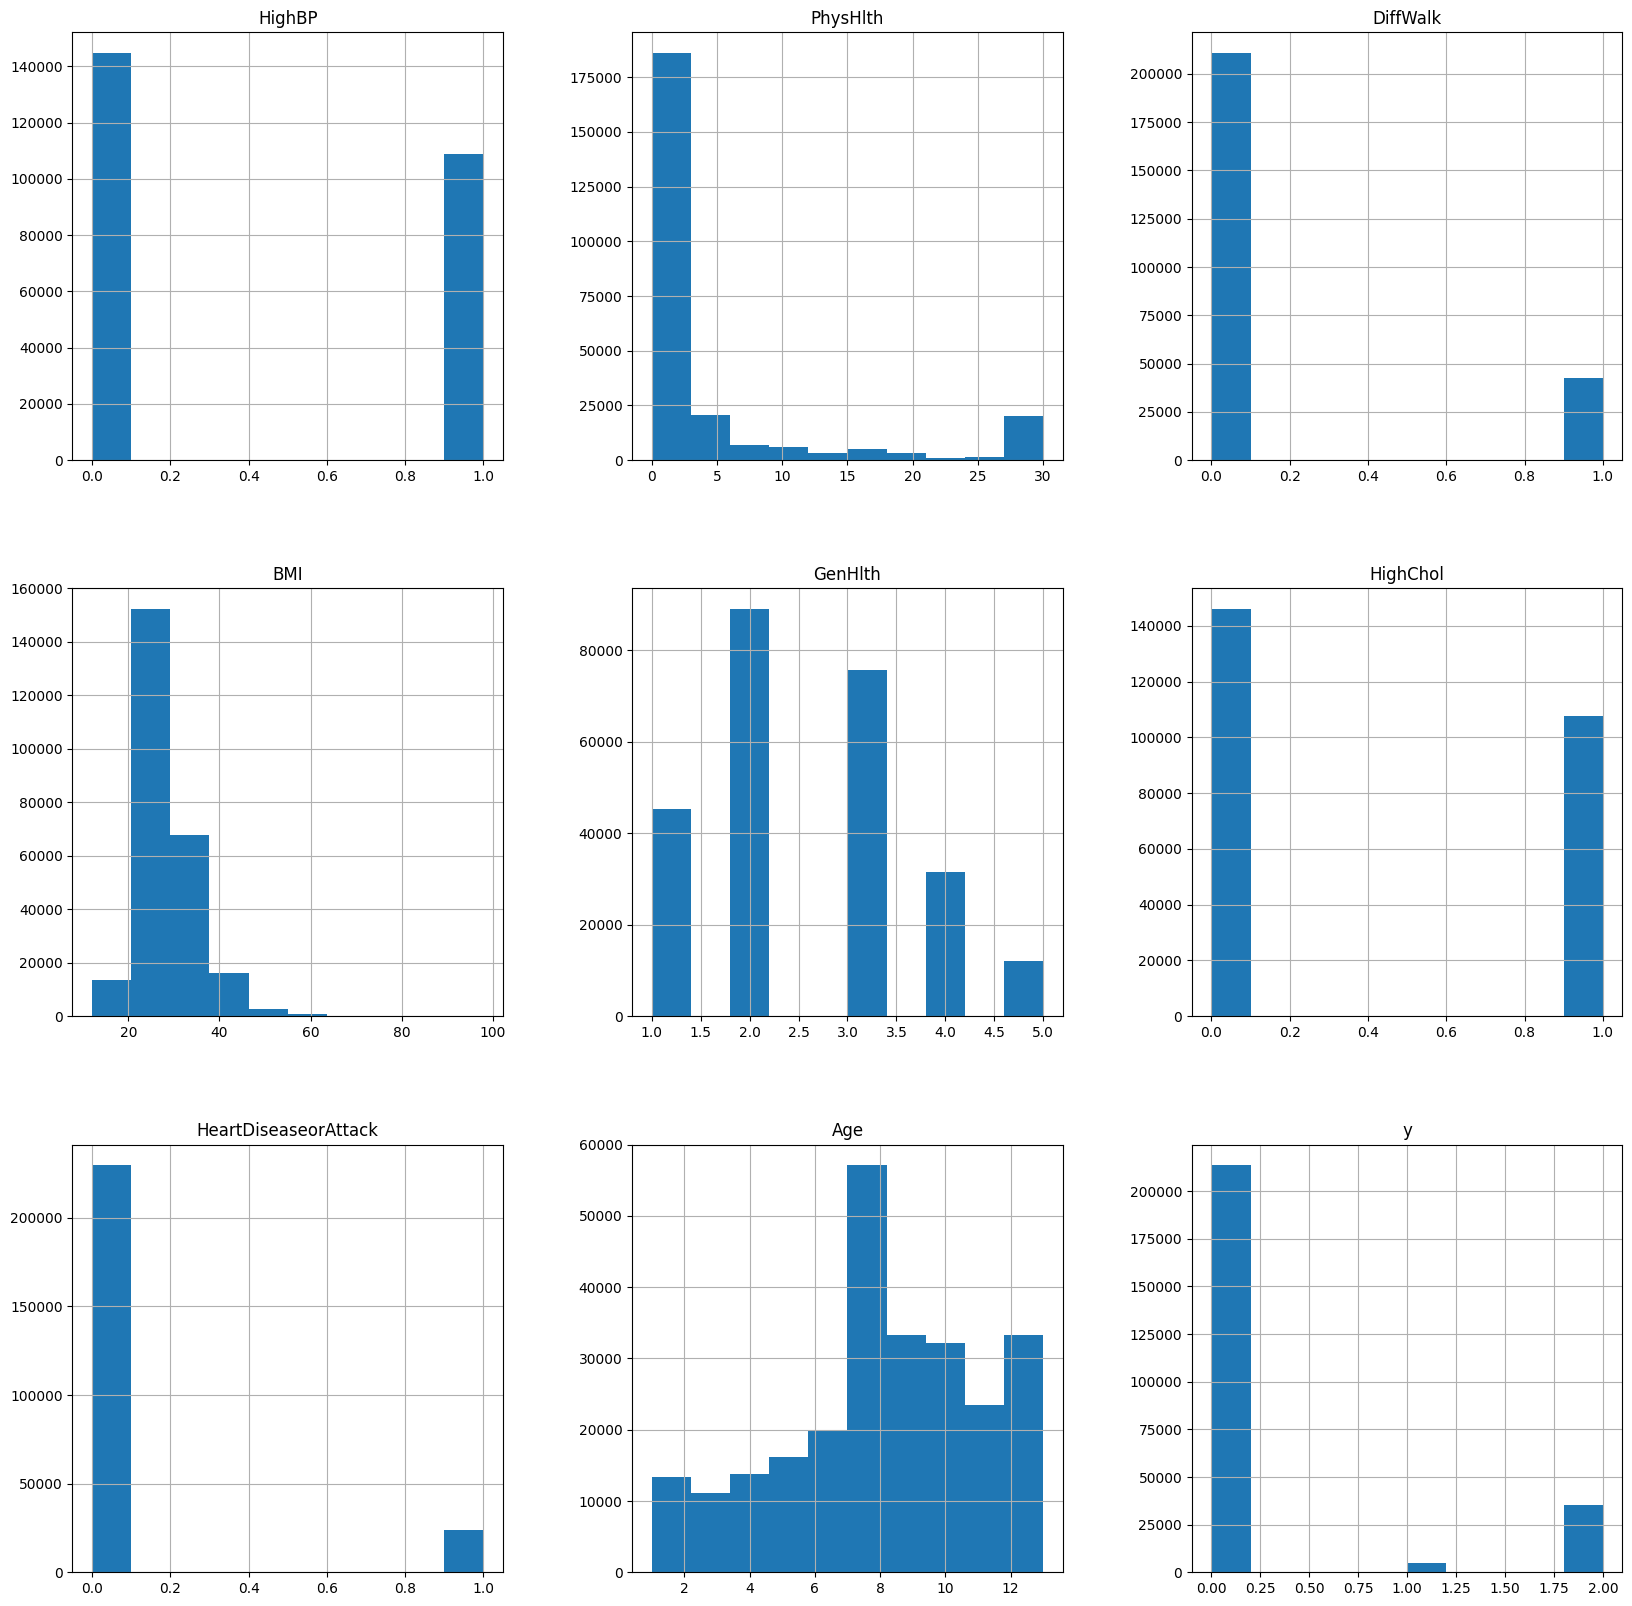

In [10]:
#bar chart of columns in data
Diabetes.hist(figsize=(20,20))
plt.show()

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5]),
 [Text(0.5, 1, 'HighBP'),
  Text(1.5, 1, 'PhysHlth'),
  Text(2.5, 1, 'DiffWalk'),
  Text(3.5, 1, 'BMI'),
  Text(4.5, 1, 'GenHlth'),
  Text(5.5, 1, 'HighChol'),
  Text(6.5, 1, 'HeartDiseaseorAttack'),
  Text(7.5, 1, 'Age'),
  Text(8.5, 1, 'y')])

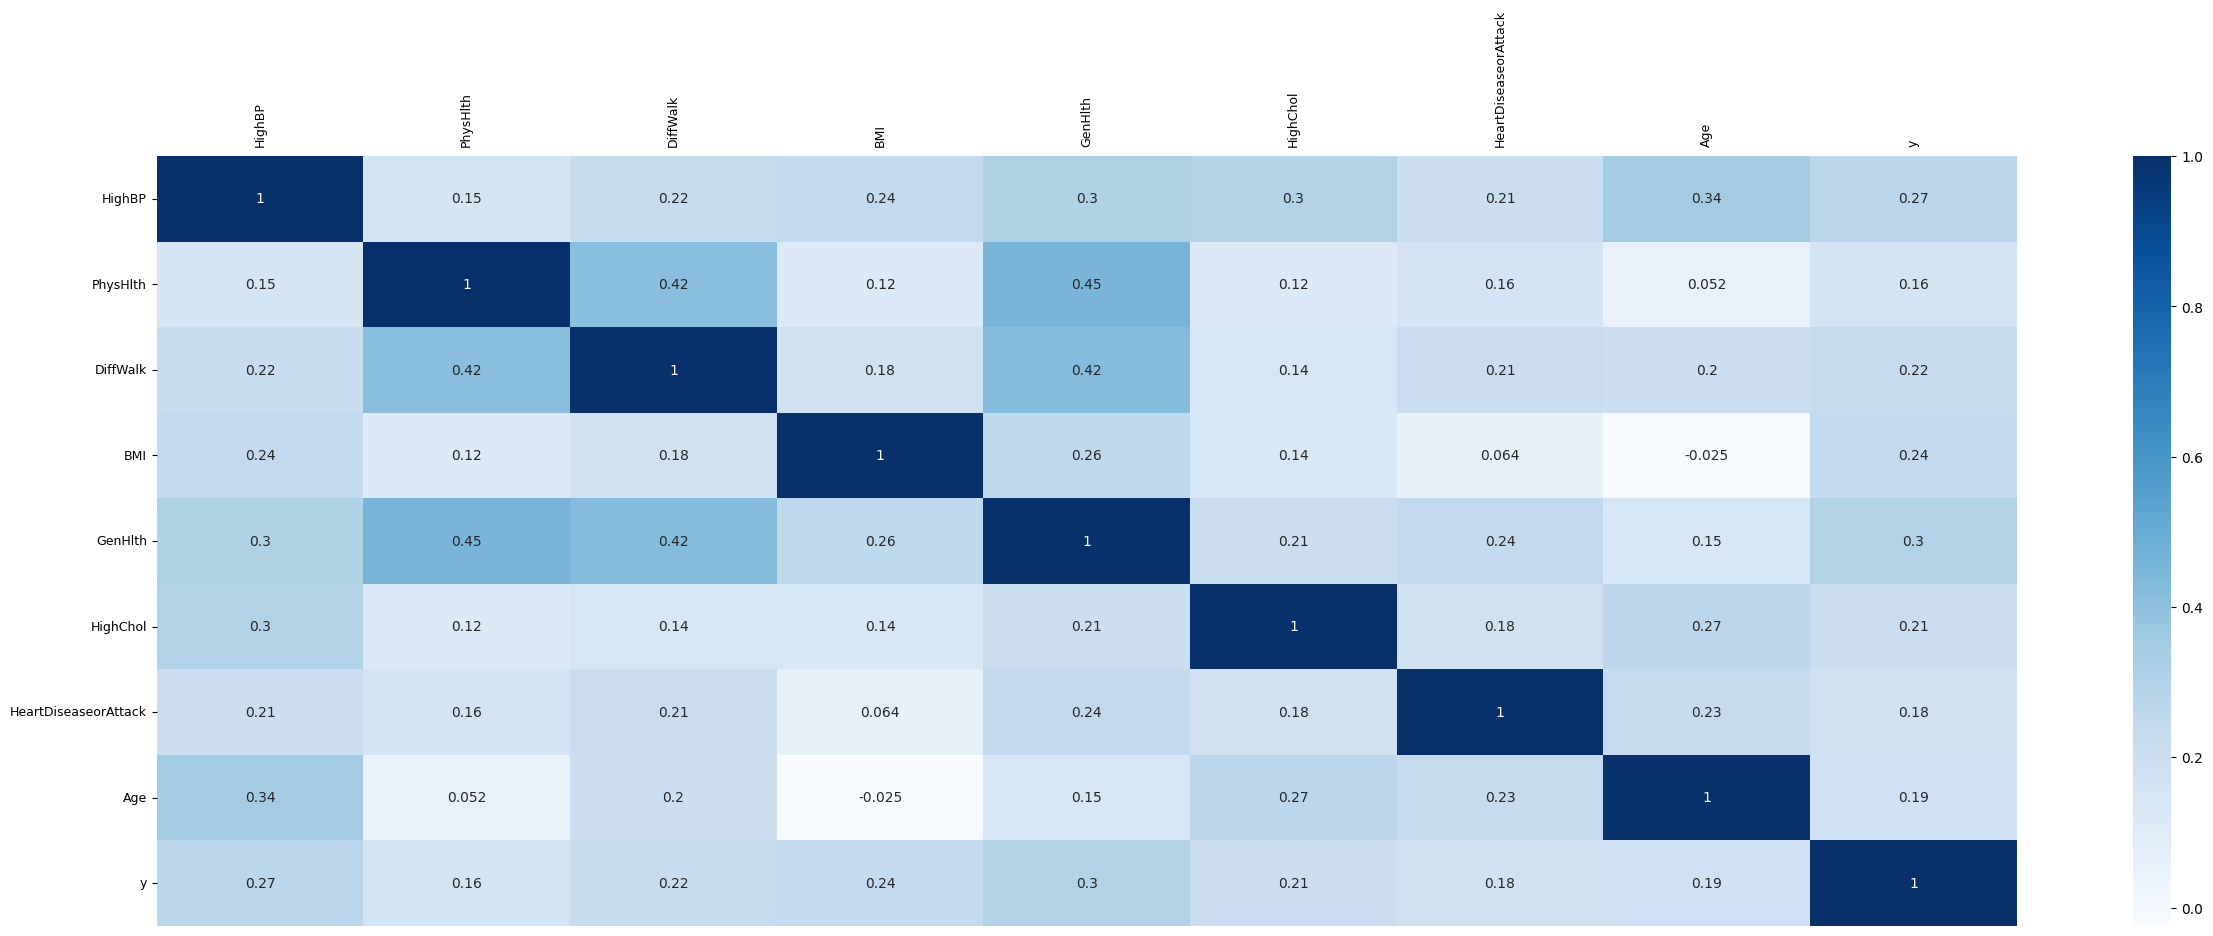

In [11]:
DataCorr_Bin_full = Diabetes.corr(method="spearman")
plt.figure(figsize=(30, 10))
sns.heatmap(DataCorr_Bin_full, cmap="Blues", annot=True)
plt.tick_params(axis='both', which='major', labelsize=9, labelbottom = False, bottom=False, top = False, labeltop=True)
plt.xticks(rotation=90)

# Start Keras Neural Network

In [12]:
Dia_train, Dia_test = train_test_split(Diabetes.copy(),
                                              shuffle=True,
                                              random_state=444,
                                              test_size=.1,
                                              stratify=Diabetes.y.values)

In [13]:
Dia_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 228312 entries, 233211 to 201049
Data columns (total 9 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   HighBP                228312 non-null  int32
 1   PhysHlth              228312 non-null  int32
 2   DiffWalk              228312 non-null  int32
 3   BMI                   228312 non-null  int32
 4   GenHlth               228312 non-null  int32
 5   HighChol              228312 non-null  int32
 6   HeartDiseaseorAttack  228312 non-null  int32
 7   Age                   228312 non-null  int32
 8   y                     228312 non-null  int32
dtypes: int32(9)
memory usage: 9.6 MB


In [14]:
Dia_tt, Dia_val = train_test_split(Dia_train,
                                       shuffle=True,
                                       random_state=555,
                                       test_size=.15,
                                       stratify=Dia_train.y)

In [15]:
Dia_tt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 194065 entries, 234821 to 220062
Data columns (total 9 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   HighBP                194065 non-null  int32
 1   PhysHlth              194065 non-null  int32
 2   DiffWalk              194065 non-null  int32
 3   BMI                   194065 non-null  int32
 4   GenHlth               194065 non-null  int32
 5   HighChol              194065 non-null  int32
 6   HeartDiseaseorAttack  194065 non-null  int32
 7   Age                   194065 non-null  int32
 8   y                     194065 non-null  int32
dtypes: int32(9)
memory usage: 8.1 MB


In [16]:
scale = StandardScaler()

X_tt = scale.fit_transform(Dia_train[Diabetes.columns[:-1]].values)


X_val = scale.transform(Dia_val[Diabetes.columns[:-1]].values)

y_tt = Dia_train.y.values
y_val = Dia_val.y.values

In [17]:
model1 = models.Sequential()

In [18]:
model1.add(layers.Dense(5, activation='relu', input_shape=(X_tt.shape[1],)))

In [19]:
model1.add(layers.Dense(1, activation='sigmoid'))

In [20]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5)                 45        
                                                                 
 dense_1 (Dense)             (None, 1)                 6         
                                                                 
Total params: 51
Trainable params: 51
Non-trainable params: 0
_________________________________________________________________


In [21]:
model1.compile(optimizer = 'rmsprop',
                 loss = 'binary_crossentropy',
                 metrics = ['accuracy'])

In [22]:
## You'll train the model for 40 epochs
n_epochs = 10

history1 = model1.fit(X_tt,
                       y_tt,
                       epochs = n_epochs,
                       batch_size = 25,
                       validation_data = (X_val, 
                                          y_val))

Epoch 1/10
9133/9133 [==============================] - 7s 723us/step - loss: 0.3776 - accuracy: 0.7005 - val_loss: 0.3618 - val_accuracy: 0.7011
Epoch 2/10
9133/9133 [==============================] - 6s 705us/step - loss: 0.3558 - accuracy: 0.7089 - val_loss: 0.3565 - val_accuracy: 0.7063
Epoch 3/10
9133/9133 [==============================] - 7s 718us/step - loss: 0.3524 - accuracy: 0.7089 - val_loss: 0.3541 - val_accuracy: 0.7182
Epoch 4/10
9133/9133 [==============================] - 6s 707us/step - loss: 0.3504 - accuracy: 0.7086 - val_loss: 0.3547 - val_accuracy: 0.7048
Epoch 5/10
9133/9133 [==============================] - 6s 710us/step - loss: 0.3501 - accuracy: 0.7082 - val_loss: 0.3547 - val_accuracy: 0.6903
Epoch 6/10
9133/9133 [==============================] - 6s 702us/step - loss: 0.3491 - accuracy: 0.7065 - val_loss: 0.3543 - val_accuracy: 0.7074
Epoch 7/10
9133/9133 [==============================] - 7s 714us/step - loss: 0.3490 - accuracy: 0.7073 - val_loss: 0.3525 -

In [23]:
pca = PCA(3)

X_pca_tt = pca.fit_transform(X_tt)
X_pca_val = pca.transform(X_val)

In [24]:
model2 =  models.Sequential()

model2.add(layers.Dense(5, activation='relu', input_shape=(X_pca_tt.shape[1],)))
model2.add(layers.Dense(5, activation='relu'))
model2.add(layers.Dense(1, activation='sigmoid'))


model2.compile(optimizer = 'rmsprop',
                 loss = 'binary_crossentropy',
                 metrics = ['accuracy'])


history2 = model2.fit(X_pca_tt,
                       y_tt,
                       epochs = n_epochs,
                       batch_size = 25,
                       validation_data = (X_pca_val, y_val))

Epoch 1/10
9133/9133 [==============================] - 7s 764us/step - loss: 0.3833 - accuracy: 0.7062 - val_loss: 0.3695 - val_accuracy: 0.7181
Epoch 2/10
9133/9133 [==============================] - 7s 728us/step - loss: 0.3494 - accuracy: 0.7295 - val_loss: 0.3372 - val_accuracy: 0.7320
Epoch 3/10
9133/9133 [==============================] - 7s 728us/step - loss: 0.3053 - accuracy: 0.7415 - val_loss: 0.2909 - val_accuracy: 0.7289
Epoch 4/10
9133/9133 [==============================] - 7s 733us/step - loss: 0.2293 - accuracy: 0.7145 - val_loss: 0.1989 - val_accuracy: 0.7140
Epoch 5/10
9133/9133 [==============================] - 7s 753us/step - loss: 0.1013 - accuracy: 0.7112 - val_loss: 0.0624 - val_accuracy: 0.7104
Epoch 6/10
9133/9133 [==============================] - 7s 740us/step - loss: -0.0875 - accuracy: 0.7110 - val_loss: -0.1269 - val_accuracy: 0.7069
Epoch 7/10
9133/9133 [==============================] - 7s 740us/step - loss: -0.3623 - accuracy: 0.7111 - val_loss: -0.38

In [25]:
model3 =  models.Sequential()

model3.add(layers.Dense(10, activation='relu', input_shape=(X_tt.shape[1],)))
model3.add(layers.Dense(10, activation='relu'))
model3.add(layers.Dense(1, activation='sigmoid'))


model3.compile(optimizer = 'rmsprop',
                 loss = 'binary_crossentropy',
                 metrics = ['accuracy'])


history3 = model3.fit(X_tt,
                       y_tt,
                       epochs = n_epochs,
                       batch_size = 25,
                       validation_data = (X_val, y_val))

Epoch 1/10
9133/9133 [==============================] - 7s 719us/step - loss: 0.3688 - accuracy: 0.7087 - val_loss: 0.3432 - val_accuracy: 0.7132
Epoch 2/10
9133/9133 [==============================] - 7s 727us/step - loss: 0.3185 - accuracy: 0.7241 - val_loss: 0.2972 - val_accuracy: 0.7439
Epoch 3/10
9133/9133 [==============================] - 7s 725us/step - loss: 0.2231 - accuracy: 0.7348 - val_loss: 0.1576 - val_accuracy: 0.7324
Epoch 4/10
9133/9133 [==============================] - 7s 738us/step - loss: -0.0179 - accuracy: 0.7218 - val_loss: -0.1667 - val_accuracy: 0.7001
Epoch 5/10
9133/9133 [==============================] - 7s 724us/step - loss: -0.5120 - accuracy: 0.7154 - val_loss: -0.7376 - val_accuracy: 0.7168
Epoch 6/10
9133/9133 [==============================] - 7s 729us/step - loss: -1.3436 - accuracy: 0.7134 - val_loss: -1.6748 - val_accuracy: 0.6992
Epoch 7/10
9133/9133 [==============================] - 7s 776us/step - loss: -2.5961 - accuracy: 0.7128 - val_loss: -

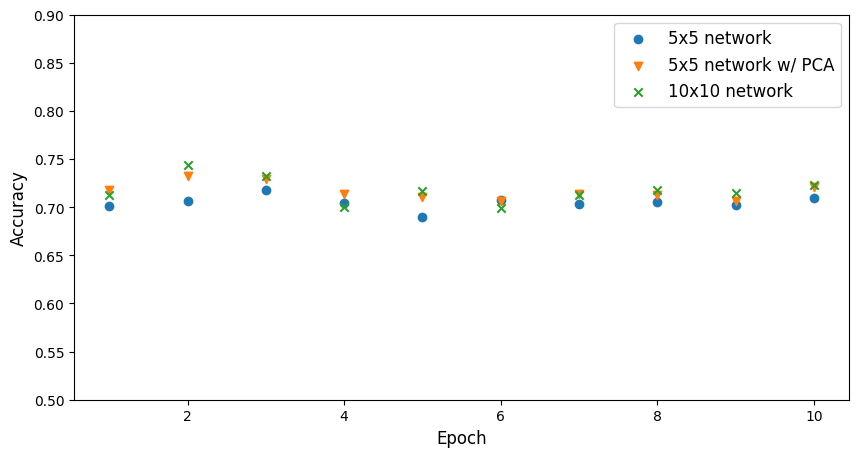

In [26]:
plt.figure(figsize=(10,5))

plt.scatter(range(1,n_epochs+1), 
            history1.history['val_accuracy'], 
            label="5x5 network")

plt.scatter(range(1,n_epochs+1), 
            history2.history['val_accuracy'], 
            marker='v',
            label="5x5 network w/ PCA")

plt.scatter(range(1,n_epochs+1), 
            history3.history['val_accuracy'], 
            marker='x',
            label="10x10 network")

plt.xlabel("Epoch", fontsize=12)
plt.ylabel("Accuracy", fontsize=12)

plt.ylim(.5,.9)


plt.legend(fontsize=12)


plt.show()

In [27]:
# test models on  Dia_test

X_test = scale.transform(Dia_test[Diabetes.columns[:-1]].values)
y_test = Dia_test.y.values

X_pca_test = pca.transform(X_test)

model1.evaluate(X_test, y_test)

model2.evaluate(X_pca_test, y_test)

model3.evaluate(X_test, y_test)



793/793 [==============================] - 0s 591us/step - loss: -13.0458 - accuracy: 0.7246


[-13.045764923095703, 0.7246136665344238]